In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor    
from joblib import Parallel, delayed

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
all_data = pd.read_excel('/content/arizona.xlsx',header=1 )

In [ ]:
all_data = pd.DataFrame(all_data)
all_data

mask = (all_data['DATE'] > '2019-01-01') & (all_data['DATE'] <= '2020-03-16')
print(all_data.loc[mask])

all_data = all_data.loc[mask]
all_data



       STATION ID       DATE  PEDESTRIAN COUNTS  ...  MIN2  MAX2  RANDOM2
0               1 2019-05-12                  0  ...     2    15        4
1               1 2019-05-13                  5  ...     2    15        4
2               1 2019-05-14                 10  ...     2    15        4
3               1 2019-05-15                  6  ...     2    15        4
4               1 2019-05-16                  3  ...     2    15        4
...           ...        ...                ...  ...   ...   ...      ...
20902          92 2020-03-12                359  ...    66   373      273
20903          92 2020-03-13                400  ...    66   373      273
20904          92 2020-03-14                110  ...    66   373      273
20905          92 2020-03-15                 97  ...    66   373      273
20906          92 2020-03-16                104  ...    66   373      273

[5901 rows x 31 columns]


,STATION ID,DATE,PEDESTRIAN COUNTS,MONTH,DAYS,DOW,AWND (km/h),PRCP (mm),SNOW (mm),TAVG (°C),TMAX (°C),TMIN (°C),LU,BUS STATION,SCHOOL/UNIVERSITY/LIBRARY,SHOP,BANK,RESTAURANT/BARS,RECRATIONAL,CONVENIENCE STORE,HOSPITAL/CLINIC,AVERAGE,MIN,MAX,RANDOM,F5,F6,AVERAGE2,MIN2,MAX2,RANDOM2
0,1,2019-05-12,0,5,12,6,3.4,2.8,0,18.9,25.0,13.9,2,0,0,0,0,0,0,0,0,6.4,1,17,12,1,0,6.91045,2,15,4
1,1,2019-05-13,5,5,13,0,2.7,0.0,0,19.1,28.9,12.2,2,0,0,0,0,0,0,0,0,6.4,1,17,12,0,0,6.91045,2,15,4
2,1,2019-05-14,10,5,14,1,2.2,0.0,0,24.0,32.8,15.6,2,0,0,0,0,0,0,0,0,6.4,1,17,12,0,0,6.91045,2,15,4
3,1,2019-05-15,6,5,15,2,3.0,0.0,0,26.7,35.6,17.2,2,0,0,0,0,0,0,0,0,6.4,1,17,12,0,0,6.91045,2,15,4
4,1,2019-05-16,3,5,16,3,5.1,0.0,0,26.2,32.2,18.3,2,0,0,0,0,0,0,0,0,6.4,1,17,12,0,0,6.91045,2,15,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20902,92,2020-03-12,359,3,12,3,2.9,1.0,0,18.7,20.6,15.6,3,2,0,9,3,11,2,0,0,159.279,19,373,347,0,0,281.219,66,373,273
20903,92,2020-03-13,400,3,13,4,3.1,3.3,0,15.4,20.0,11.1,3,2,0,9,3,11,2,0,0,159.279,19,373,347,0,0,281.219,66,373,273
20904,92,2020-03-14,110,3,14,5,2.5,0.0,0,13.9,22.8,8.3,3,2,0,9,3,11,2,0,0,159.279,19,373,347,0,0,281.219,66,373,273
20905,92,2020-03-15,97,3,15,6,2.2,0.0,0,15.8,25.0,8.9,3,2,0,9,3,11,2,0,0,159.279,19,373,347,0,0,281.219,66,373,273


In [ ]:
ind1 = np.where(all_data['F5'].values == 1)
ind2 = np.where(all_data['F6'].values == 1)
ind1 = ind1[0]
ind2 = ind2[0]
ind = np.unique(np.concatenate((ind1,ind2),0))
data = all_data.drop(all_data.index[ind])
data = data.reset_index(drop=True)
data

,STATION ID,DATE,PEDESTRIAN COUNTS,MONTH,DAYS,DOW,AWND (km/h),PRCP (mm),SNOW (mm),TAVG (°C),TMAX (°C),TMIN (°C),LU,BUS STATION,SCHOOL/UNIVERSITY/LIBRARY,SHOP,BANK,RESTAURANT/BARS,RECRATIONAL,CONVENIENCE STORE,HOSPITAL/CLINIC,AVERAGE,MIN,MAX,RANDOM,F5,F6,AVERAGE2,MIN2,MAX2,RANDOM2
0,1,2019-05-13,5,5,13,0,2.7,0.0,0,19.1,28.9,12.2,2,0,0,0,0,0,0,0,0,6.4,1,17,12,0,0,6.91045,2,15,4
1,1,2019-05-14,10,5,14,1,2.2,0.0,0,24.0,32.8,15.6,2,0,0,0,0,0,0,0,0,6.4,1,17,12,0,0,6.91045,2,15,4
2,1,2019-05-15,6,5,15,2,3.0,0.0,0,26.7,35.6,17.2,2,0,0,0,0,0,0,0,0,6.4,1,17,12,0,0,6.91045,2,15,4
3,1,2019-05-16,3,5,16,3,5.1,0.0,0,26.2,32.2,18.3,2,0,0,0,0,0,0,0,0,6.4,1,17,12,0,0,6.91045,2,15,4
4,1,2019-05-17,7,5,17,4,3.7,0.0,0,21.7,26.7,14.4,2,0,0,0,0,0,0,0,0,6.4,1,17,12,0,0,6.91045,2,15,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942,92,2020-03-12,359,3,12,3,2.9,1.0,0,18.7,20.6,15.6,3,2,0,9,3,11,2,0,0,159.279,19,373,347,0,0,281.219,66,373,273
4943,92,2020-03-13,400,3,13,4,3.1,3.3,0,15.4,20.0,11.1,3,2,0,9,3,11,2,0,0,159.279,19,373,347,0,0,281.219,66,373,273
4944,92,2020-03-14,110,3,14,5,2.5,0.0,0,13.9,22.8,8.3,3,2,0,9,3,11,2,0,0,159.279,19,373,347,0,0,281.219,66,373,273
4945,92,2020-03-15,97,3,15,6,2.2,0.0,0,15.8,25.0,8.9,3,2,0,9,3,11,2,0,0,159.279,19,373,347,0,0,281.219,66,373,273


In [ ]:
# spliting the train and test set
np.random.seed(seed=63)
# np.random.seed(seed=45)
# np.random.seed(seed=20)

rnd_stations = np.random.randint(1,94, size = 15,)
print(rnd_stations)
test_stations_ind = []
for i in range(len(rnd_stations)):
  stations_ind = np.where( data['STATION ID'].values == rnd_stations[i] )[0].tolist()
  test_stations_ind.append(stations_ind)
print(len(np.hstack(test_stations_ind)))
test_stations_ind = np.hstack(test_stations_ind)
test_stations_ind = list(map(int, test_stations_ind))
print(test_stations_ind)


[45 12 88 83 33 18  1 79 92 71 62 45 20 15 38]
978
[455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 4078, 4079, 4080, 4081, 4082, 4083, 4084, 4085, 4086, 4087, 4088, 4089, 4090, 4091, 4092, 4093, 4094, 4095, 4096, 4097, 4098, 4099, 4100, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4108, 4109, 4110, 4111, 4112, 4113, 4114, 4115, 4116, 4117, 4118, 4119, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4130, 4131, 4132, 4133, 4134, 4135, 4136, 4137, 4138, 4139, 4140, 4141, 4142, 4143, 4144, 4145, 4146, 4147, 4148, 4149, 4150, 4151, 4152, 4153, 4154, 4155, 4156, 4157, 4158, 4159, 4160, 4161, 4162, 4163, 4164, 4165, 4166, 4167, 4168, 4169, 4170, 4171, 4172, 4173, 4174, 4175, 4176, 4177, 4178, 4179, 4180, 4181, 4182, 4183, 4184, 4185, 4186, 4187, 4188, 4189, 4190, 4191, 4192, 4193, 4194, 4195, 4196, 4197, 4198, 4199, 4200, 4201, 4202, 4203, 4204, 4205, 4206, 4207, 4208, 4209, 4210, 4211, 4212, 4213, 4214, 4215, 4216, 4217, 4218, 4219, 4220, 4221, 4222, 4223, 42

In [ ]:
# adjusting the categorical and ordinal data
## adjusting the LU 
from collections import Counter
p = data['LU'].tolist()
c = Counter(p)
print(c)
r = {2:1,3:2,4:3,1:2,5:3} # residential area = 1/employment center and comercial centre = 2/other = 3
data['LU_d'] = data.LU.replace(r)
c2 = Counter(data['LU_d'].tolist())
print(c2)
## adjusting the bus station
p = data['BUS STATION'].tolist()
c = Counter(p)
print(c)
r = {0:1,1:2,2:2,3:3,4:3,} #0 bus station = 1 , 1 and 2 bus station = 2 ,3 and 4 bus station = 3
data['BAS STATION_d'] = data['BUS STATION'].replace(r)
c2 = Counter(data['BAS STATION_d'].tolist())
print(c2)

## adjusting the SCHOOL/UNIVERSITY/LIBRARY 
p = data['SCHOOL/UNIVERSITY/LIBRARY'].tolist()
c = Counter(p)
print(c)
r = {0:1,1:2,2:3,3:3} #0 uni = 1 , 1 uni = 2 ,2 and 3 uni = 3
data['SCHOOL/UNIVERSITY/LIBRARY_d'] = data['SCHOOL/UNIVERSITY/LIBRARY'].replace(r)
c2 = Counter(data['SCHOOL/UNIVERSITY/LIBRARY_d'].tolist())
print(c2)

## adjusting shop
p = data['SHOP'].tolist()
c = Counter(p)
print(c)
r = {0:1,1:2,2:3,3:3,4:3,5:3,6:3,7:4,8:4,9:4,10:4,11:4,12:4} # 0 SHOP = 1/1 SHOP = 2,2-6 SHOP = 3,7-12 SHOP = 4
data['SHOP_d'] = data['SHOP'].replace(r)
c2 = Counter(data['SHOP_d'].tolist())
print(c2)

## adjusting bank

p = data['BANK'].tolist()
c = Counter(p)
print(c)
r = {0:1,1:2,2:2,3:3} #0 BANK = 1 , 1 BANK = 2 ,2 and 3 BANK = 3
data['BANK_d'] = data['BANK'].replace(r)
c2 = Counter(data['BANK_d'].tolist())
print(c2)

## adjusting RESTAURANT/BARS

p = data['RESTAURANT/BARS'].tolist()
c = Counter(p)
print(c)
r = {0:1,1:2,2:3,3:3,4:3,5:3,6:3,7:4,8:4,9:4,10:4,11:4,12:4} #LIKE SHOP
data['RESTAURANT/BARS_d'] = data['RESTAURANT/BARS'].replace(r)
c2 = Counter(data['RESTAURANT/BARS_d'].tolist())
print(c2)

## adjusting RECRATIONAL

p = data['RECRATIONAL'].tolist()
c = Counter(p)
print(c)
r = {0:1,1:2,2:2,3:3,4:3} #0 RECRATIONAL = 1 , 1 AND 2 RECRATIONAL = 2 ,3 and 4 RECRATIONAL = 3
data['RECRATIONAL_d'] = data['RECRATIONAL'].replace(r)
c2 = Counter(data['RECRATIONAL_d'].tolist())
print(c2)

## adjusting HOSPITAL/CLINIC

p = data['HOSPITAL/CLINIC'].tolist()
c = Counter(p)
print(c)
r = {0:1,1:2,2:2,3:3,4:3,5:3,6:3} #
data['HOSPITAL/CLINIC_d'] = data['HOSPITAL/CLINIC'].replace(r)
c2 = Counter(data['HOSPITAL/CLINIC_d'].tolist())
print(c2)

## adjusting DOW

p = data['DOW'].tolist()
c = Counter(p)
print(c)
r = {0:0,1:0,2:0,3:0,4:0,5:1,6:1} #
data['DOW_d'] = data['DOW'].replace(r)
c2 = Counter(data['DOW_d'].tolist())
print(c2)

data












Counter({2: 2872, 4: 970, 1: 521, 3: 436, 5: 148})
Counter({1: 2872, 3: 1118, 2: 957})
Counter({0: 2570, 2: 1767, 4: 313, 1: 241, 3: 56})
Counter({1: 2570, 2: 2008, 3: 369})
Counter({0: 3631, 1: 698, 2: 605, 3: 13})
Counter({1: 3631, 2: 698, 3: 618})
Counter({0: 3371, 1: 709, 3: 339, 2: 278, 9: 102, 5: 74, 7: 74})
Counter({1: 3371, 2: 709, 3: 691, 4: 176})
Counter({0: 4319, 1: 423, 3: 107, 2: 98})
Counter({1: 4319, 2: 521, 3: 107})
Counter({0: 3035, 1: 1441, 4: 159, 5: 119, 11: 102, 3: 70, 8: 21})
Counter({1: 3035, 2: 1441, 3: 348, 4: 123})
Counter({0: 3818, 2: 536, 4: 440, 1: 118, 3: 35})
Counter({1: 3818, 2: 654, 3: 475})
Counter({0: 4512, 1: 316, 6: 119})
Counter({1: 4512, 2: 316, 3: 119})
Counter({0: 729, 4: 712, 6: 710, 5: 708, 3: 704, 2: 698, 1: 686})
Counter({0: 3529, 1: 1418})


,STATION ID,DATE,PEDESTRIAN COUNTS,MONTH,DAYS,DOW,AWND (km/h),PRCP (mm),SNOW (mm),TAVG (°C),TMAX (°C),TMIN (°C),LU,BUS STATION,SCHOOL/UNIVERSITY/LIBRARY,SHOP,BANK,RESTAURANT/BARS,RECRATIONAL,CONVENIENCE STORE,HOSPITAL/CLINIC,AVERAGE,MIN,MAX,RANDOM,F5,F6,AVERAGE2,MIN2,MAX2,RANDOM2,LU_d,BAS STATION_d,SCHOOL/UNIVERSITY/LIBRARY_d,SHOP_d,BANK_d,RESTAURANT/BARS_d,RECRATIONAL_d,HOSPITAL/CLINIC_d,DOW_d
0,1,2019-05-13,5,5,13,0,2.7,0.0,0,19.1,28.9,12.2,2,0,0,0,0,0,0,0,0,6.4,1,17,12,0,0,6.91045,2,15,4,1,1,1,1,1,1,1,1,0
1,1,2019-05-14,10,5,14,1,2.2,0.0,0,24.0,32.8,15.6,2,0,0,0,0,0,0,0,0,6.4,1,17,12,0,0,6.91045,2,15,4,1,1,1,1,1,1,1,1,0
2,1,2019-05-15,6,5,15,2,3.0,0.0,0,26.7,35.6,17.2,2,0,0,0,0,0,0,0,0,6.4,1,17,12,0,0,6.91045,2,15,4,1,1,1,1,1,1,1,1,0
3,1,2019-05-16,3,5,16,3,5.1,0.0,0,26.2,32.2,18.3,2,0,0,0,0,0,0,0,0,6.4,1,17,12,0,0,6.91045,2,15,4,1,1,1,1,1,1,1,1,0
4,1,2019-05-17,7,5,17,4,3.7,0.0,0,21.7,26.7,14.4,2,0,0,0,0,0,0,0,0,6.4,1,17,12,0,0,6.91045,2,15,4,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942,92,2020-03-12,359,3,12,3,2.9,1.0,0,18.7,20.6,15.6,3,2,0,9,3,11,2,0,0,159.279,19,373,347,0,0,281.219,66,373,273,2,2,1,4,3,4,2,1,0
4943,92,2020-03-13,400,3,13,4,3.1,3.3,0,15.4,20.0,11.1,3,2,0,9,3,11,2,0,0,159.279,19,373,347,0,0,281.219,66,373,273,2,2,1,4,3,4,2,1,0
4944,92,2020-03-14,110,3,14,5,2.5,0.0,0,13.9,22.8,8.3,3,2,0,9,3,11,2,0,0,159.279,19,373,347,0,0,281.219,66,373,273,2,2,1,4,3,4,2,1,1
4945,92,2020-03-15,97,3,15,6,2.2,0.0,0,15.8,25.0,8.9,3,2,0,9,3,11,2,0,0,159.279,19,373,347,0,0,281.219,66,373,273,2,2,1,4,3,4,2,1,1


In [ ]:
interested_features1 = ['MONTH','DAYS','DOW_d','PRCP (mm)','SNOW (mm)', 'TAVG (°C)','RANDOM2','LU_d','BUS STATION']
interested_features2 = ['MONTH','DAYS','DOW_d','PRCP (mm)','SNOW (mm)','RANDOM2','LU_d','BUS STATION',	'SCHOOL/UNIVERSITY/LIBRARY',	'SHOP',	'BANK',	'RESTAURANT/BARS',	'RECRATIONAL',	'HOSPITAL/CLINIC']
data_features = data[interested_features2]
data_features2 = data[interested_features1]
data_features = data_features.astype(int)
data_features2 = data_features2.astype(int)

  
def multicollinearity_check(X, thresh=5):
    data_type = X.dtypes
    # print(type(data_type))
    int_cols = \
    X.select_dtypes(include=['int', 'int16', 'int32', 'int64', 'float', 'float16', 'float32', 'float64']).shape[1]
    total_cols = X.shape[1]
    try:
        if int_cols != total_cols:
            raise Exception('All the columns should be integer or float, for multicollinearity test.')
        else:
            variables = list(range(X.shape[1]))
            dropped = True
            print('''\n\nThe VIF calculator will now iterate through the features and calculate their respective values.
            It shall continue dropping the highest VIF features until all the features have VIF less than the threshold of 5.\n\n''')
            while dropped:
                dropped = False
                vif = [variance_inflation_factor(X.iloc[:, variables].values, ix) for ix in variables]
                print('\n\nvif is: ', vif)
                maxloc = vif.index(max(vif))
                if max(vif) > thresh:
                    print('dropping \'' + X.iloc[:, variables].columns[maxloc] + '\' at index: ' + str(maxloc))
                    # del variables[maxloc]
                    X.drop(X.columns[variables[maxloc]], 1, inplace=True)
                    variables = list(range(X.shape[1]))
                    dropped = True

            print('\n\nRemaining variables:\n')
            print(X.columns[variables])
            # return X.iloc[:,variables]
            return X
    except Exception as e:
        print('Error caught: ', e)




data_features = multicollinearity_check(data_features, thresh=6.5)
data_features2 =multicollinearity_check(data_features2, thresh=5.4)



The VIF calculator will now iterate through the features and calculate their respective values.
            It shall continue dropping the highest VIF features until all the features have VIF less than the threshold of 5.




vif is:  [2.6640553306320256, 3.403146266901277, 1.3638523519540524, 1.1375642252863756, 1.038219243170152, 6.301497753447618, 6.724529163738748, 4.144303437045653, 2.301653750865512, 2.953266305060498, 2.503383499258392, 4.505889898118702, 5.808813106205124, 1.47558942208376]
dropping 'LU_d' at index: 6


vif is:  [2.4823513291822277, 2.653368457552422, 1.3217514345905446, 1.1375468544980463, 1.038172113466192, 6.2982069752258, 4.018603298870577, 2.27832957980056, 2.7886229055754255, 2.4415972803239203, 4.346648339578317, 4.00103298251372, 1.4181415120384822]


Remaining variables:

Index(['MONTH', 'DAYS', 'DOW_d', 'PRCP (mm)', 'SNOW (mm)', 'RANDOM2',
       'BUS STATION', 'SCHOOL/UNIVERSITY/LIBRARY', 'SHOP', 'BANK',
       'RESTAURANT/BARS', 'RECRATIONAL', 'HO

In [ ]:
data_features

,MONTH,DAYS,DOW_d,PRCP (mm),SNOW (mm),RANDOM2,BUS STATION,SCHOOL/UNIVERSITY/LIBRARY,SHOP,BANK,RESTAURANT/BARS,RECRATIONAL,HOSPITAL/CLINIC
0,5,13,0,0,0,4,0,0,0,0,0,0,0
1,5,14,0,0,0,4,0,0,0,0,0,0,0
2,5,15,0,0,0,4,0,0,0,0,0,0,0
3,5,16,0,0,0,4,0,0,0,0,0,0,0
4,5,17,0,0,0,4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942,3,12,0,1,0,273,2,0,9,3,11,2,0
4943,3,13,0,3,0,273,2,0,9,3,11,2,0
4944,3,14,1,0,0,273,2,0,9,3,11,2,0
4945,3,15,1,0,0,273,2,0,9,3,11,2,0


In [ ]:
data_features2 

,MONTH,DAYS,DOW_d,PRCP (mm),SNOW (mm),RANDOM2,LU_d,BUS STATION
0,5,13,0,0,0,4,1,0
1,5,14,0,0,0,4,1,0
2,5,15,0,0,0,4,1,0
3,5,16,0,0,0,4,1,0
4,5,17,0,0,0,4,1,0
...,...,...,...,...,...,...,...,...
4942,3,12,0,1,0,273,2,2
4943,3,13,0,3,0,273,2,2
4944,3,14,1,0,0,273,2,2
4945,3,15,1,0,0,273,2,2


In [ ]:
# ONE-HOT encoding of the features

#DOW
one_hot = pd.get_dummies(data_features['DOW_d'], prefix = 'DOW_du', drop_first = True)
data_features = pd.concat([data_features,one_hot],axis=1)


#MONTHS
one_hot = pd.get_dummies(data_features['MONTH'], prefix = 'MONTH_du', drop_first = False)
data_features = pd.concat([data_features,one_hot],axis=1)

#DAYS
one_hot = pd.get_dummies(data_features['DAYS'], prefix = 'DAYS_du', drop_first = False)
data_features = pd.concat([data_features,one_hot],axis=1)

# lu
one_hot = pd.get_dummies(data_features2['LU_d'], prefix = 'lu_du', drop_first = False)
data_features2 = pd.concat([data_features2,one_hot],axis=1)

one_hot = pd.get_dummies(data_features2['DOW_d'], prefix = 'DOW_du', drop_first = True)
data_features2 = pd.concat([data_features2,one_hot],axis=1)


#MONTHS
one_hot = pd.get_dummies(data_features2['MONTH'], prefix = 'MONTH_du', drop_first = False)
data_features2 = pd.concat([data_features2,one_hot],axis=1)

#DAYS
one_hot = pd.get_dummies(data_features2['DAYS'], prefix = 'DAYS_du', drop_first = False)
data_features2 = pd.concat([data_features2,one_hot],axis=1)

data_features





,MONTH,DAYS,DOW_d,PRCP (mm),SNOW (mm),RANDOM2,BUS STATION,SCHOOL/UNIVERSITY/LIBRARY,SHOP,BANK,RESTAURANT/BARS,RECRATIONAL,HOSPITAL/CLINIC,DOW_du_1,MONTH_du_1,MONTH_du_2,MONTH_du_3,MONTH_du_4,MONTH_du_5,MONTH_du_6,MONTH_du_7,MONTH_du_8,MONTH_du_9,MONTH_du_10,MONTH_du_11,MONTH_du_12,DAYS_du_1,DAYS_du_2,DAYS_du_3,DAYS_du_4,DAYS_du_5,DAYS_du_6,DAYS_du_7,DAYS_du_8,DAYS_du_9,DAYS_du_10,DAYS_du_11,DAYS_du_12,DAYS_du_13,DAYS_du_14,DAYS_du_15,DAYS_du_16,DAYS_du_17,DAYS_du_18,DAYS_du_19,DAYS_du_20,DAYS_du_21,DAYS_du_22,DAYS_du_23,DAYS_du_24,DAYS_du_25,DAYS_du_26,DAYS_du_27,DAYS_du_28,DAYS_du_29,DAYS_du_30,DAYS_du_31
0,5,13,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,14,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,15,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,16,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,17,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942,3,12,0,1,0,273,2,0,9,3,11,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4943,3,13,0,3,0,273,2,0,9,3,11,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4944,3,14,1,0,0,273,2,0,9,3,11,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4945,3,15,1,0,0,273,2,0,9,3,11,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_features2


,MONTH,DAYS,DOW_d,PRCP (mm),SNOW (mm),RANDOM2,LU_d,BUS STATION,lu_du_1,lu_du_2,lu_du_3,DOW_du_1,MONTH_du_1,MONTH_du_2,MONTH_du_3,MONTH_du_4,MONTH_du_5,MONTH_du_6,MONTH_du_7,MONTH_du_8,MONTH_du_9,MONTH_du_10,MONTH_du_11,MONTH_du_12,DAYS_du_1,DAYS_du_2,DAYS_du_3,DAYS_du_4,DAYS_du_5,DAYS_du_6,DAYS_du_7,DAYS_du_8,DAYS_du_9,DAYS_du_10,DAYS_du_11,DAYS_du_12,DAYS_du_13,DAYS_du_14,DAYS_du_15,DAYS_du_16,DAYS_du_17,DAYS_du_18,DAYS_du_19,DAYS_du_20,DAYS_du_21,DAYS_du_22,DAYS_du_23,DAYS_du_24,DAYS_du_25,DAYS_du_26,DAYS_du_27,DAYS_du_28,DAYS_du_29,DAYS_du_30,DAYS_du_31
0,5,13,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,14,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,15,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,16,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,17,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942,3,12,0,1,0,273,2,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4943,3,13,0,3,0,273,2,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4944,3,14,1,0,0,273,2,2,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4945,3,15,1,0,0,273,2,2,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
def plot_linear_regression_mean_squared_errors(mean_squared_errors,hyperparams):
  plt.plot(hyperparams,mean_squared_errors)
  plt.ylabel('mean squared error')
  plt.xlabel('lambda')
  plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# FESTURES SET ONE
X1 = data_features.drop(data_features.columns[0:3],1)

# FESTURES SET TWO
X2 = data_features2.drop(data_features2.columns[0:3],1)
X2 = X2.drop(X2.columns[3],1)


Y = pd.DataFrame(data['PEDESTRIAN COUNTS'])

X1_fit = X1.drop(X1.index[test_stations_ind])
Y_fit = Y.drop(Y.index[test_stations_ind])

X1_test = pd.DataFrame(X1, index=test_stations_ind )
Y_test = pd.DataFrame(Y,index = test_stations_ind)




X2_fit = X2.drop(X2.index[test_stations_ind])


X2_test = pd.DataFrame(X2, index=test_stations_ind )



print(pd.DataFrame(X1_fit))
print(Y_fit)
print(X1_test)
print(Y_test)

X_train, X_val, y_train, y_val = train_test_split(X1_fit.values, Y_fit.values, test_size=0.15, random_state=42, shuffle = True )
#X_train, X_val, y_train, y_val = train_test_split(X1.values, Y.values, test_size=0.15, random_state=42, shuffle = True )
#X_train, X_val, y_train, y_val = train_test_split(X2_fit.values, Y_fit.values, test_size=0.15, random_state=42, shuffle = True )
print(X_train.shape)
print(y_val.shape)
print(X1)

    

  



      PRCP (mm)  SNOW (mm)  RANDOM2  ...  DAYS_du_29  DAYS_du_30  DAYS_du_31
307           0          0       36  ...           0           0           0
308           0          0       36  ...           0           0           0
309           0          0       36  ...           0           0           0
310           0          0       36  ...           0           0           0
311           0          0       36  ...           0           0           0
...         ...        ...      ...  ...         ...         ...         ...
4840          1          0       37  ...           0           0           0
4841          3          0       37  ...           0           0           0
4842          0          0       37  ...           0           0           0
4843          0          0       37  ...           0           0           0
4844          0          0       37  ...           0           0           0

[3969 rows x 54 columns]
      PEDESTRIAN COUNTS
307                  10
30

In [ ]:
X2

,PRCP (mm),SNOW (mm),RANDOM2,BUS STATION,lu_du_1,lu_du_2,lu_du_3,DOW_du_1,MONTH_du_1,MONTH_du_2,MONTH_du_3,MONTH_du_4,MONTH_du_5,MONTH_du_6,MONTH_du_7,MONTH_du_8,MONTH_du_9,MONTH_du_10,MONTH_du_11,MONTH_du_12,DAYS_du_1,DAYS_du_2,DAYS_du_3,DAYS_du_4,DAYS_du_5,DAYS_du_6,DAYS_du_7,DAYS_du_8,DAYS_du_9,DAYS_du_10,DAYS_du_11,DAYS_du_12,DAYS_du_13,DAYS_du_14,DAYS_du_15,DAYS_du_16,DAYS_du_17,DAYS_du_18,DAYS_du_19,DAYS_du_20,DAYS_du_21,DAYS_du_22,DAYS_du_23,DAYS_du_24,DAYS_du_25,DAYS_du_26,DAYS_du_27,DAYS_du_28,DAYS_du_29,DAYS_du_30,DAYS_du_31
0,0,0,4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942,1,0,273,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4943,3,0,273,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4944,0,0,273,2,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4945,0,0,273,2,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
with pd.ExcelWriter('arizona_pre_covid.xlsx') as writer:  
    X1_fit.to_excel(writer, sheet_name='features_set_one_train')
    X2_fit.to_excel(writer, sheet_name='features_set_two_train')
    X1_test.to_excel(writer, sheet_name='features_set_one_test')
    X2_test.to_excel(writer, sheet_name='features_set_two_test')
    Y_fit.to_excel(writer, sheet_name='ped_counts_train')
    Y_test.to_excel(writer, sheet_name='ped_counts_test')





In [ ]:
X1_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
803,0.296296,0.0,0.017182,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
804,0.037037,0.0,0.017182,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
805,0.000000,0.0,0.017182,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
806,0.000000,0.0,0.017182,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
807,0.000000,0.0,0.017182,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,0.037037,0.0,0.096220,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1464,0.111111,0.0,0.096220,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1465,0.000000,0.0,0.096220,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1466,0.000000,0.0,0.096220,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X1
#X1.to_excel('arizona_features.xlsx', sheet_name = 'features_set_2',)

,PRCP (mm),SNOW (mm),RANDOM2,BUS STATION,SCHOOL/UNIVERSITY/LIBRARY,SHOP,BANK,RESTAURANT/BARS,RECRATIONAL,HOSPITAL/CLINIC,DOW_du_1,MONTH_du_1,MONTH_du_2,MONTH_du_3,MONTH_du_4,MONTH_du_5,MONTH_du_6,MONTH_du_7,MONTH_du_8,MONTH_du_9,MONTH_du_10,MONTH_du_11,MONTH_du_12,DAYS_du_1,DAYS_du_2,DAYS_du_3,DAYS_du_4,DAYS_du_5,DAYS_du_6,DAYS_du_7,DAYS_du_8,DAYS_du_9,DAYS_du_10,DAYS_du_11,DAYS_du_12,DAYS_du_13,DAYS_du_14,DAYS_du_15,DAYS_du_16,DAYS_du_17,DAYS_du_18,DAYS_du_19,DAYS_du_20,DAYS_du_21,DAYS_du_22,DAYS_du_23,DAYS_du_24,DAYS_du_25,DAYS_du_26,DAYS_du_27,DAYS_du_28,DAYS_du_29,DAYS_du_30,DAYS_du_31
0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942,1,0,273,2,0,9,3,11,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4943,3,0,273,2,0,9,3,11,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4944,0,0,273,2,0,9,3,11,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4945,0,0,273,2,0,9,3,11,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.linear_model import Lasso
def lasso_regression(xtrain,ytrain,xval,yval, alpha):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(xtrain,ytrain)
    y_pred = lassoreg.predict(xval)

    #Return the result in pre-defined format
    rss = sum((y_pred-yval.flatten())**2) / y_pred.shape[0]
    return rss

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
def ridge_regression(xtrain,ytrain,xval,yval, alpha):
    #Fit the model
    ridgreg = Ridge(alpha=alpha,normalize=False, max_iter=1e5)
    ridgreg.fit(xtrain,ytrain)
    y_pred = ridgreg.predict(xval)

    #Return the result in pre-defined format
    mss = sum((y_pred-yval)**2) / y_pred.shape[0]
    r2 = r2_score(yval, y_pred)

    return mss,r2,yval,y_pred

In [ ]:
mss,r2,yval,ypred = ridge_regression(X_train,y_train,X_val,y_val, 0.9)
print(mss),print(r2)

error = yval-ypred

dic = {'true' :yval.tolist(),'pred' :  ypred.tolist(), 'err' : error.tolist()}
t = pd.DataFrame(dic) 
t.to_csv('t.csv')

[2098.83638958]
0.6550450099604832


In [ ]:
mss = lasso_regression(X_train,y_train,X_val,y_val, 0.3)
mss

2817.429284200567

In [ ]:
ridgreg = Ridge(alpha=0.3,normalize=True, max_iter=1e5)
ridgreg.fit(X_train,y_train)
y_pred = ridgreg.predict(X_val)
print(sum((y_pred-y_val)**2) / y_pred.shape[0])
print(y_pred-y_val)
print(y_val)


[2255.36257475]
[[ 3.08522987e+01]
 [ 1.05153503e+02]
 [-6.96976412e+01]
 [ 1.11062201e+01]
 [ 6.23299176e+00]
 [ 3.48690127e+01]
 [ 1.53389742e+01]
 [ 5.55839152e+01]
 [-1.14882845e+01]
 [ 5.44206934e+01]
 [ 1.24057089e+02]
 [ 1.35378357e+02]
 [ 1.19828651e+01]
 [ 5.42416873e+00]
 [-1.18263828e+02]
 [ 3.91073857e+01]
 [ 4.41801811e+01]
 [-2.03120604e+01]
 [ 6.83880668e+00]
 [ 5.52864521e+00]
 [ 1.84005855e+01]
 [ 1.93380252e+01]
 [ 1.22055365e+01]
 [ 2.92749798e+01]
 [ 6.54062971e+01]
 [ 1.54720721e+01]
 [-1.39306205e+02]
 [-6.52659672e+01]
 [ 4.61151819e+01]
 [ 9.17781776e+00]
 [-2.53243469e+01]
 [-3.76457838e+01]
 [ 8.69301254e+00]
 [ 2.23099091e+01]
 [ 1.35299764e+01]
 [ 9.43884974e+00]
 [ 1.96562015e+01]
 [ 4.17189000e+01]
 [-3.07346523e+01]
 [ 1.66001864e+00]
 [ 1.35928568e+00]
 [-9.57075380e+00]
 [-7.06609712e+01]
 [ 1.65823490e+01]
 [-3.65810725e+00]
 [ 1.05592194e+01]
 [-1.59779067e+01]
 [ 2.38569127e+01]
 [ 2.77327555e+01]
 [-1.66549475e+01]
 [-7.26715854e-01]
 [ 4.39076594e+

In [ ]:
def predict_linear_regression(inputs, weights):

  predicted_values = np.zeros(inputs.shape[0])
  predicted_values = inputs @ weights
  
  return predicted_values

In [ ]:
def eval_linear_regression(inputs, weights, targets):

  predicted_values = predict_linear_regression(inputs,weights)
  mean_squared_error = np.sum ( ( np.ravel(predicted_values) - targets ) ** 2 , axis = 0) / inputs.shape[0]

  return mean_squared_error

In [ ]:
def train_linear_regression(train_inputs, train_targets, lambda_hyperparam):

 # weights = np.zeros(train_inputs.shape[1])

 # b matrix
    tx = train_targets.reshape(train_inputs.shape[0], 1) * train_inputs
    b = np.sum(tx, axis=0)
    # A matrix
    aa = train_inputs.transpose() @ train_inputs
    lm = np.eye(train_inputs.shape[1], dtype=int) * lambda_hyperparam

    weights = np.linalg.pinv(aa + lm)@b

    return weights

In [ ]:
def cross_validation_linear_regression(k_folds, hyperparameters, inputs, targets):

  # making validation and test matrices
  fold_num = k_folds
  validation_inputs = np.zeros( ( inputs.shape[0]//k_folds , inputs.shape[1] , k_folds ) )
  train_inputs_ = np.zeros((  inputs.shape[0] - inputs.shape[0]//k_folds , inputs.shape[1] , k_folds  ))
  validation_targets = np.zeros(( inputs.shape[0]//k_folds , k_folds))
  train_targets_ = np.zeros(( inputs.shape[0] - inputs.shape[0]//k_folds , k_folds))
  # filling validation and test matrices

  for i in range(0 , fold_num):
   validation_inputs [ : , : , i] = inputs [  i * inputs.shape[0] // k_folds : (inputs.shape[0]//k_folds * (i + 1)) , 0 : inputs.shape[1]]
   validation_targets [: , i] = targets [( i * inputs.shape[0] // k_folds) : (train_inputs.shape[0]//k_folds) * (i + 1)]

   train_inputs_[ : , : , i] = np.delete ( inputs , np.s_[( i * inputs.shape[0] // k_folds) : (inputs.shape[0]//k_folds) * (i + 1)] , axis=0  )
   train_targets_[: , i] = np.delete ( targets , np.s_[ ( i * inputs.shape[0] // k_folds) : (inputs.shape[0]//k_folds) * (i + 1) ] , axis = 0 )

  mse_matrix = np.zeros(( k_folds , len(hyperparameters) ))    # filling the accuracies matrix. x axes is # of hyperparameters (neighbours) and y axes is each fold of our train_inputs
    
  for ii in range(k_folds):
    for j in range(len(hyperparameters)):
      w = train_linear_regression(train_inputs_[:,:,ii], train_targets_[:,ii], hyperparameters[j])
      mse_matrix[ii,j] = eval_linear_regression (validation_inputs[:,:,ii], w , validation_targets[:,ii] )
      
      #eval_linear_regression(inputs, weights, targets)
      # we made the accuracies matrix, i is looping for folds and j is looping for # of hyperparameters
  mean_squared_errors = mse_matrix.mean(0)
  best_hyperparam = hyperparameters[np.argmin(mean_squared_errors)]
  best_mean_squared_error = np.min(mean_squared_errors)
  
  return best_hyperparam, best_mean_squared_error, mean_squared_errors

In [ ]:
X1_fit.values.shape

(3595, 54)

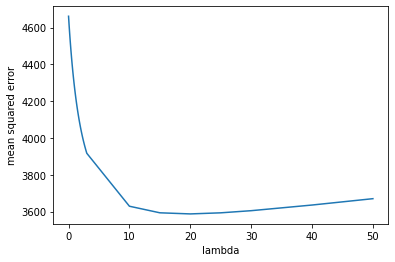

best lambda: 20
best cross validation mean squared error: 3587.035381181928
test mean squared error: 1745.751976332453


In [ ]:
# load data



train_inputs = X1_fit.values
train_targets = Y_fit.values.flatten()
test_inputs = X1_test.values
test_targets = Y_test.values.flatten()

# add 1 at the end of each data point
train_inputs = np.concatenate((train_inputs,np.ones((train_inputs.shape[0],1))),1)
test_inputs = np.concatenate((test_inputs,np.ones((test_inputs.shape[0],1))),1)

# lambda values to be evaluated by cross validation
hyperparams = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0,10,15,20,25,30,40,50]
k_folds = 8
best_lambda, best_mean_squared_error, mean_squared_errors = cross_validation_linear_regression(k_folds,hyperparams,train_inputs,train_targets)

# plot results
plot_linear_regression_mean_squared_errors(mean_squared_errors,hyperparams)
print('best lambda: ' + str (best_lambda))
print('best cross validation mean squared error: ' + str(best_mean_squared_error))

# train and evaluate with best lambda
weights = train_linear_regression(train_inputs,train_targets,best_lambda)
mean_squared_error = eval_linear_regression(test_inputs, weights, test_targets)
print('test mean squared error: ' + str(mean_squared_error))



In [ ]:
a = range(0:20)

SyntaxError: ignored

Hello professor,

PROJECT:

I did some experiments on the data. Before I tell you the result, I would like to say what I have done.
1- I put a filter to consider the data between 2019-01-01 and 2020-03-16 to avoid the covid effects on the model.
2- Consequently, I changed the STC's, except for our usual constraints, I added a filter that cancels out the STC days which fall in the covid time (after 2020-03-16).
3- I changed the days, months, DOW, and LU categories to ONE-HOT vectors. I found out that the days, months, and DOW also should be considered categorical data. In our case, increasing or decreasing their number would not have any numerical order. Assume we have a function that takes day number as one of the inputs and then give the possible salary. Here, the number of days or months have meaning, but in our case, it is not like this due to my understanding. So, I treat them as categorical data. FOR EXAMPLE, 001000000000 mean month 3.
4 - The total number of valid data points is 4946. I divided to test and train with the ratio of 20/80 and then split to train and validation set with the ratio of 15/85. For the test set, the samples are in order in their date for 15 specific sites to keep track of the AADP for further tests. The validation set is chosen randomly.
5- I have two sets of features. One of them is based on the LU categories, and the other is based on LU characteristics. LU category has three types (residential, employment and commercial area, and others). LU characteristics are the number of shops, banks, etc.
6 - For the first attempt to select the best set of features, I used ridge regression.
7- I used the variance inflation factor (VIF) to drop the features that have colinearity with others. You are right that we can not have LU categories and LU characteristics together. Although I set the VIF threshold to be 5, in one case (Considering the samples before covid), I changed the VIF threshold to 6.5 from 5 to not drop the LU categories. Other VIF's are all less than 5, and due to my search, the best threshold is 5, but features less than 10 could also work without problem in the data set. In Think 6.3, for LU categories in the pre-covid data set would not be problematic.
8- DOW is 0 for weekdays and 1 for weekends. I included the days in my models.
9- When I changed the STC's days and canceled out after covid days, the STC's make more sense now. I added the new STC's columns in the attached excel file(arizona.xlsx)

REGRESSION RESULTS:
Using all of the data: R2 = 0.32, MSE = 2000
Using data before pandemic(feature set one= using LU


# NN

In [ ]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# parameters for this script
batch_size = 12
epochs = 120

from sklearn.model_selection import train_test_split

# FESTURES SET ONE
X1 = data_features.drop(data_features.columns[0:3],1)

# FESTURES SET TWO
X2 = data_features2.drop(data_features2.columns[0:3],1)
X2 = X2.drop(X2.columns[3],1)

# Normalizing the data X1 and X2
# X1
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1)
X2 = scaler.fit_transform(X2)

X1 = pd.DataFrame(X1)
X2 = pd.DataFrame(X2)





Y = pd.DataFrame(data['PEDESTRIAN COUNTS'])

X1_fit = X1.drop(X1.index[test_stations_ind])
Y_fit = Y.drop(Y.index[test_stations_ind])

X1_test = pd.DataFrame(X1, index=test_stations_ind )
Y_test = pd.DataFrame(Y,index = test_stations_ind)


X2_fit = X2.drop(X2.index[test_stations_ind])
X2_test = pd.DataFrame(X2, index=test_stations_ind )







In [ ]:
X1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,0.000000,0.0,0.006873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.006873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.006873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.006873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.006873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942,0.037037,0.0,0.931271,0.5,0.0,1.0,1.0,1.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4943,0.111111,0.0,0.931271,0.5,0.0,1.0,1.0,1.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4944,0.000000,0.0,0.931271,0.5,0.0,1.0,1.0,1.0,0.5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4945,0.000000,0.0,0.931271,0.5,0.0,1.0,1.0,1.0,0.5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
model = Sequential()

model.add(Dense(12, input_dim=X1.shape[1], kernel_initializer='he_uniform'))
model.add(Activation('sigmoid'))
model.add(Dropout(0))








model.add(Dense(1))
model.add(Activation('linear'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20000)             1100000   
_________________________________________________________________
activation (Activation)      (None, 20000)             0         
_________________________________________________________________
dropout (Dropout)            (None, 20000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 20001     
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 1,120,001
Trainable params: 1,120,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# initiate Adam optimizer
opt = keras.optimizers.Adam()
opt2 = keras.optimizers.SGD(lr=0.01, momentum=0.9)
# Compile the model before using it
model.compile(loss='mean_squared_error',
              optimizer=opt,
              metrics=['accuracy','mse'] ,)
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 12)                660       
_________________________________________________________________
activation_11 (Activation)   (None, 12)                0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 13        
_________________________________________________________________
activation_12 (Activation)   (None, 1)                 0         
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/120
331/331 [==============================] - 1s 2ms/step - loss: 1656.5439 - accuracy: 0.0108 - mse: 1656.5439 - val_loss: 1001.8445 - val_accuracy: 0.0041 - val_mse: 1001.8445

Epoch 00001: val_mse improved from inf to 1001.84448, saving model to best_model3.h5
Epoch 2/120
331/331 [==============================] - 1s 2ms/step - loss: 1652.3590 - accuracy: 0.0108 - mse: 1652.3590 - val_loss: 999.4435 - val_accuracy: 0.0041 - val_mse: 999.4435

Epoch 00002: val_mse improved from 1001.84448 to 999.44354, saving model to best_model3.h5
Epoch 3/120
331/331 [==============================] - 1s 2ms/step - loss: 1648.0051 - accuracy: 0.0108 - mse: 1648.0051 - val_loss: 998.9086 - val_accuracy: 0.0041 - val_mse: 998.9086

Epoch 00003: val_mse improved from 999.44354 to 998.90863, saving model to best_model3.h5
Epoch 4/120
331/331 [==============================] - 1s 2ms/step - loss: 1644.4680 - accuracy: 0.0108 - mse: 1644.4680 - val_loss: 995.1622 - val_accuracy: 0.0041 - val_mse

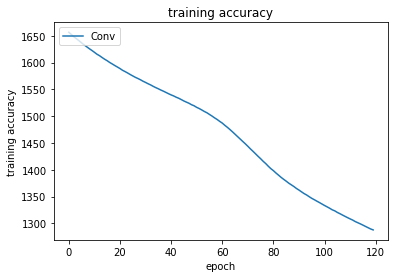

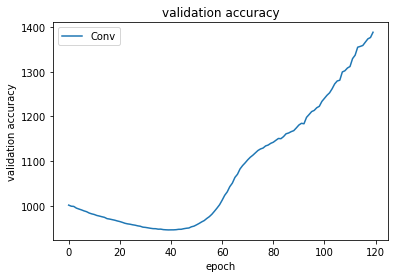

31/31 [==============================] - 0s 1ms/step - loss: 946.3992 - accuracy: 0.0041 - mse: 946.3992
Test accuracy: [946.3992309570312, 0.004089979454874992, 946.3992309570312]


In [ ]:
# create a callback that will save the best model while training
save_best_model = ModelCheckpoint('best_model3.h5', monitor='val_mse', mode='min', save_best_only=True, verbose=1, )

history = model.fit(X1_fit.values, Y_fit.values,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(X1_test.values, Y_test.values),
                  
                  shuffle=True,
                  callbacks=[save_best_model])

# history = model.fit(X1.values, Y.values,
#                   batch_size=batch_size,
#                   epochs=epochs,
#                   validation_split= 0.2 ,
#                   shuffle=True,
#                   callbacks=[save_best_model], )


# Plot training accuracy
plt.plot(history.history['mse'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history.history['val_mse'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model = load_model('best_model3.h5')
scores = saved_model.evaluate(X1_test.values, Y_test.values, verbose=1)
print('Test accuracy:', scores)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
def ridge_regression(xtrain,ytrain,xval,yval, alpha):
    #Fit the model
    ridgreg = Ridge(alpha=alpha,normalize=False, max_iter=1e5)
    ridgreg.fit(xtrain,ytrain)
    y_pred = ridgreg.predict(xval)

    #Return the result in pre-defined format
    mss = sum((y_pred-yval)**2) / y_pred.shape[0]
    r2 = r2_score(yval, y_pred)

    return mss,r2,yval,y_pred

In [ ]:
mss,r2,yval,ypred = ridge_regression(X1_fit.values,Y_fit.values,X1_test.values,Y_test.values, 20)
print(mss),print(r2)

[1745.13828066]
0.667478887625963


(None, None)

In [ ]:
saved_model = load_model('best_model.h5')
pred = saved_model.predict(X1_test.values, verbose=1)
r2 = r2_score(Y_test,pred)
r2


31/31 [==============================] - 0s 776us/step


0.8009804739762836

In [ ]:
X2_fit

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
307,0.000000,0.0,0.116838,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308,0.000000,0.0,0.116838,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309,0.000000,0.0,0.116838,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,0.000000,0.0,0.116838,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
311,0.000000,0.0,0.116838,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4840,0.037037,0.0,0.120275,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4841,0.111111,0.0,0.120275,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4842,0.000000,0.0,0.120275,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4843,0.000000,0.0,0.120275,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Gaussian Process Regression


In [ ]:
def predict_gaussian_process(inputs, posterior):

  mean , variance = posterior(inputs)
  return mean, variance

In [ ]:
def eval_gaussian_process(inputs, posterior, targets):
  mean , variance = posterior(inputs)
  diff = mean-targets
  mean_squared_error = np.mean(diff**2)

  return mean_squared_error

In [ ]:
def train_gaussian_process(train_inputs, train_targets, measurement_variance, kernel, kernel_param):

  inverse_regularized_gram_matrix = np.linalg.inv(kernel(train_inputs,train_inputs,kernel_param)+measurement_variance*np.eye(train_inputs.shape[0]))
  
  # define a function that computes a posterior distribution over the outputs given some inputs
  # inputs: 
  #     inputs: matrix of input points for which we would like to predict a Gaussian over the outputs (numpy array of N' data points x M features)
  #     train_inputs: matrix of train inputs that serve as evidence for the posterior (numpy array of N data points x M features)
  #     train_targets: vector of train targets that serve as evidence for the posterior (numpy array of N targets)
  #     inverse_regularized_gram_matrix: (K + sigma^2 I)^{-1}
  # outputs:
  #     mean: vector of Gaussian means for each prediction (numpy array of N' means)
  #     variance: vector of Gaussian variances for each prediction (numpy array of N' variances)
  def posterior(inputs, train_inputs=train_inputs, train_targets=train_targets, inverse_regularized_gram_matrix=inverse_regularized_gram_matrix, kernel=kernel):
    mean = kernel(inputs, train_inputs, kernel_param) @ inverse_regularized_gram_matrix @ train_targets
    variance = kernel(inputs, inputs, kernel_param) + (measurement_variance ** 2) * np.eye(inputs.shape[0]) - kernel(inputs, train_inputs, kernel_param) @ inverse_regularized_gram_matrix @ kernel(train_inputs, inputs, kernel_param)

    return mean, variance

  return posterior

In [ ]:
def identity_kernel(inputs1,inputs2,dummy_param=None):
  gram_matrix = inputs1 @ inputs2.T
  return gram_matrix

In [ ]:
def polynomial_kernel(inputs1,inputs2,degree):
  gram_matrix = (inputs1 @ inputs2.T + 1) ** degree
  return gram_matrix

In [ ]:
def gaussian_kernel(inputs1,inputs2,width):

    gram_matrix = np.zeros([inputs1.shape[0], inputs2.shape[0]], dtype=float)
    nd = inputs2.shape[0]
    for i in range(nd):
        diff2 = np.sum((inputs1 - inputs2[i, :]) ** 2, axis=-1)
        gram_matrix[:, i] = np.exp(-diff2 / (2 * width ** 2))
  
    return gram_matrix

In [ ]:
def cross_validation_gaussian_process(k_folds, kernel, hyperparameters, inputs, targets, measurement_variance):

# making validation and test matrices
  fold_num = k_folds
  validation_inputs = np.zeros( ( inputs.shape[0]//k_folds , inputs.shape[1] , k_folds ) )
  train_inputs_ = np.zeros((  inputs.shape[0] - inputs.shape[0]//k_folds , inputs.shape[1] , k_folds  ))
  validation_targets = np.zeros(( inputs.shape[0]//k_folds , k_folds))
  train_targets_ = np.zeros(( inputs.shape[0] - inputs.shape[0]//k_folds , k_folds))
  # filling validation and test matrices

  for i in range(0 , fold_num):
   validation_inputs [ : , : , i] = inputs [  i * inputs.shape[0] // k_folds : (inputs.shape[0]//k_folds * (i + 1)) , 0 : inputs.shape[1]]
   validation_targets [: , i] = targets [( i * inputs.shape[0] // k_folds) : (train_inputs.shape[0]//k_folds) * (i + 1)]

   train_inputs_[ : , : , i] = np.delete ( inputs , np.s_[( i * inputs.shape[0] // k_folds) : (inputs.shape[0]//k_folds) * (i + 1)] , axis=0  )
   train_targets_[: , i] = np.delete ( targets , np.s_[ ( i * inputs.shape[0] // k_folds) : (inputs.shape[0]//k_folds) * (i + 1) ] , axis = 0 )

  mse_matrix = np.zeros(( k_folds , len(hyperparameters) ))    # filling the accuracies matrix. x axes is # of hyperparameters (neighbours) and y axes is each fold of our train_inputs
  
  for ii in range(k_folds):
    for j in range(len(hyperparameters)):
     posterior = train_gaussian_process(train_inputs_[:,:,ii], train_targets_[:,ii], measurement_variance, kernel, hyperparameters[j] )
     mse_matrix[ii,j] = eval_gaussian_process(validation_inputs[:,:,ii], posterior, validation_targets[:,ii])

  mean_squared_errors = mse_matrix.mean(0)
  best_hyperparam = hyperparameters[np.argmin(mean_squared_errors)]
  best_mean_squared_error = np.min(mean_squared_errors)


  return best_hyperparam, best_mean_squared_error, mean_squared_errors

In [ ]:
def plot_gaussian_process_mean_squared_errors(mean_squared_errors,hyperparams,xlabel):
  plt.plot(hyperparams,mean_squared_errors)
  plt.ylabel('mean squared error')
  plt.xlabel(xlabel)
  plt.show()


Identity Kernel
test mean squared error with identity kernel: 1860.3122794471678

Gaussian Kernel


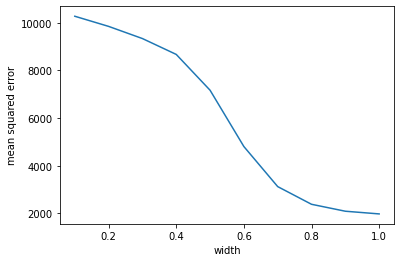

best width: 1.0
best cross validation mean squared error: 1980.228038687759
test mean squared error with Gaussian kernel: 3855.4295191739902


In [ ]:
# load data
train_inputs = X1_fit.values
train_targets = Y_fit.values.flatten()
test_inputs = X1_test.values
test_targets = Y_test.values.flatten()

# likelihood parameter (see definition of train_gaussian_process for more details)
measurement_variance = 1

# number of folds in k-fold cross validation
k_folds = 9

# identity kernel
print('\nIdentity Kernel')
posterior = train_gaussian_process(train_inputs, train_targets, measurement_variance, identity_kernel, None)
mean_squared_error = eval_gaussian_process(test_inputs, posterior, test_targets)
print('test mean squared error with identity kernel: ' + str(mean_squared_error))

# # polynomial kernel
# print('\nPolynomial Kernel')
# # degrees to be evaluated by cross validation
# hyperparams = range(1,21)
# best_degree, best_mean_squared_error, mean_squared_errors = \
#   cross_validation_gaussian_process(k_folds,polynomial_kernel,hyperparams,train_inputs,train_targets,measurement_variance)
# plot_gaussian_process_mean_squared_errors(mean_squared_errors,hyperparams,'degree')
# print('best degree: ' + str (best_degree))
# print('best cross validation mean squared error: ' + str(best_mean_squared_error))
# posterior = train_gaussian_process(train_inputs, train_targets, measurement_variance, polynomial_kernel, best_degree)
# mean_squared_error = eval_gaussian_process(test_inputs, posterior, test_targets)
# print('test mean squared error with polynomial kernel: ' + str(mean_squared_error))

# gaussian kernel
print('\nGaussian Kernel')
# gaussian widths to be evaluated by cross validation
hyperparams = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
best_width, best_mean_squared_error, mean_squared_errors = \
  cross_validation_gaussian_process(k_folds,gaussian_kernel,hyperparams,train_inputs,train_targets,measurement_variance)
plot_gaussian_process_mean_squared_errors(mean_squared_errors,hyperparams,'width')
print('best width: ' + str (best_width))
print('best cross validation mean squared error: ' + str(best_mean_squared_error))
posterior = train_gaussian_process(train_inputs, train_targets, measurement_variance, gaussian_kernel, best_width)
mean_squared_error = eval_gaussian_process(test_inputs, posterior, test_targets)
print('test mean squared error with Gaussian kernel: ' + str(mean_squared_error))